In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [3]:
def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.4f' % height, rotation=90, 
                ha='center', va='bottom', fontsize=15, zorder=3)

In [100]:
def plot(xticks, data, ylim=None, figsize=(25, 10)):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    colors = ['salmon', 'orange', 'cadetblue', 'skyblue', 'plum']
    width = 0.15
    for i, model in enumerate(data.keys()):
        pos = compute_pos(xticks, width, i, data.keys())
        bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
        present_height(ax, bar)

    ax.set_xticks(np.arange(len(xticks)))
    ax.set_xticklabels(xticks, fontsize=15)	

    if not ylim is None:
        plt.ylim(ymax=ylim)
    ax.set_ylabel('False Negative Rate', fontsize=20)
    ax.legend(loc='upper right', shadow=True, ncol=1, fontsize=15)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
    plt.tight_layout()
    return fig, ax

In [96]:
%matplotlib inline
xticks = ['DoS', 'Fuzzy', 'Gear', 'RPM']
data_by_bs = {
    '512': [  0.0064, 0.0333 ,0.0592, 0.0604
],
    '1024': [  0.0120, 0.0380, 0.0565, 0.0556
],
    '2048': [  0.0359, 0.1155, 0.2108, 0.1739
],
    '4096': [  0.0212, 0.0721, 0.1104, 0.1019
] 
}

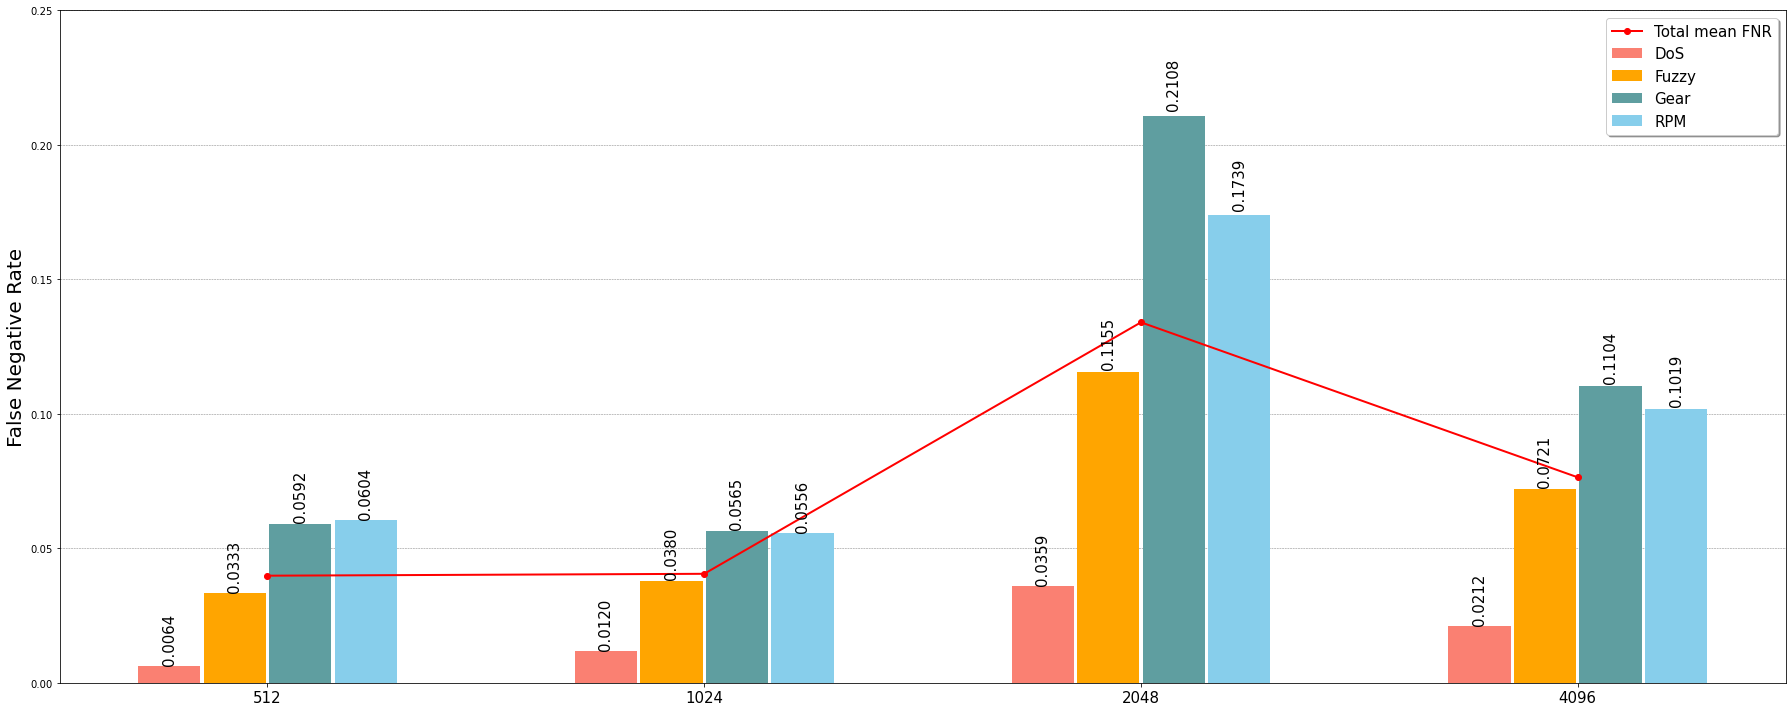

In [110]:
xticks = ['512', '1024', '2048', '4096']
data_by_attack = {
    'DoS': [0.0064, 0.0120,  0.0359, 0.0212],
    'Fuzzy': [0.0333, 0.0380, 0.1155, 0.0721],
    'Gear': [0.0592, 0.0565, 0.2108, 0.1104],
    'RPM': [0.0604, 0.0556, 0.1739,  0.1019]
}
fig, ax = plot(xticks, data, ylim=0.25)
values = [np.mean(v) for v in data_by_bs.values()]
ax.plot(xticks, values, color='red', marker='o', linewidth=2, zorder=1,
       label='Total mean FNR')
ax.legend(loc='upper right', shadow=True, ncol=1, fontsize=15)

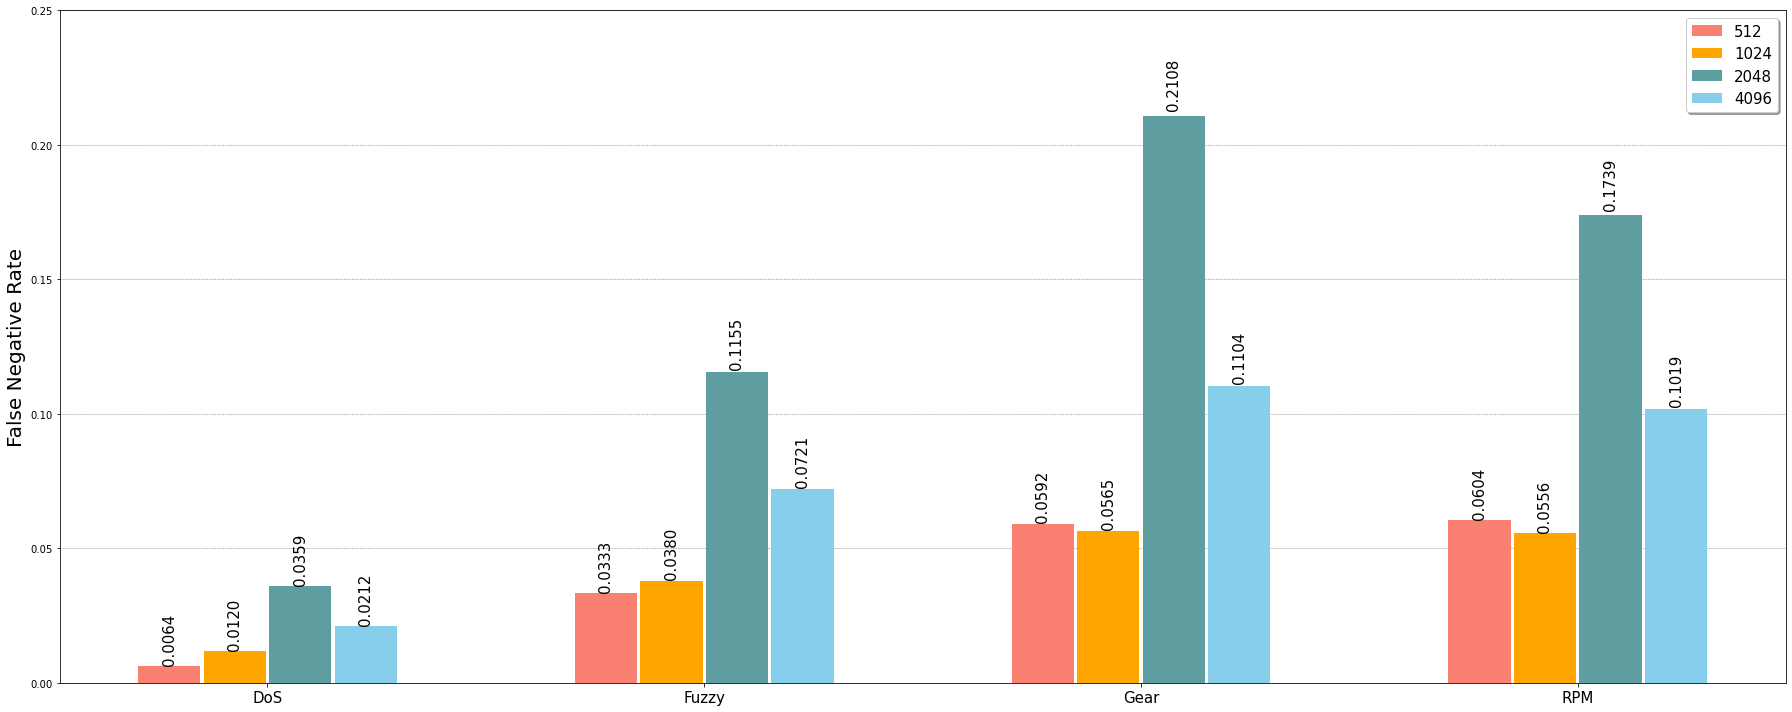

In [22]:
plot(xticks, data, ylim=0.25)

In [55]:
# KIA
train = np.array([
    [0.0381, 0.0883, 0.6799, 0.2302],
    # [0.0000, 0.0000, 0.0069, 0.0000],
    [0.0404, 0.0552, 0.4808, 0.1219],
    [0.0000 , 0.0000, 0.0549, 0.0271]
])

val = np.array([
    [0.1221, 0.0772, 1.7934, 0.7886], # Random
    # [0.0444, 0.0257, 0.4003, 0.2208],
    [0.1221, 0.0515, 0.8807, 1.0095], # CE
    [0.0000, 0.0000, 0.1922, 0.1577] # Supcon
]) 

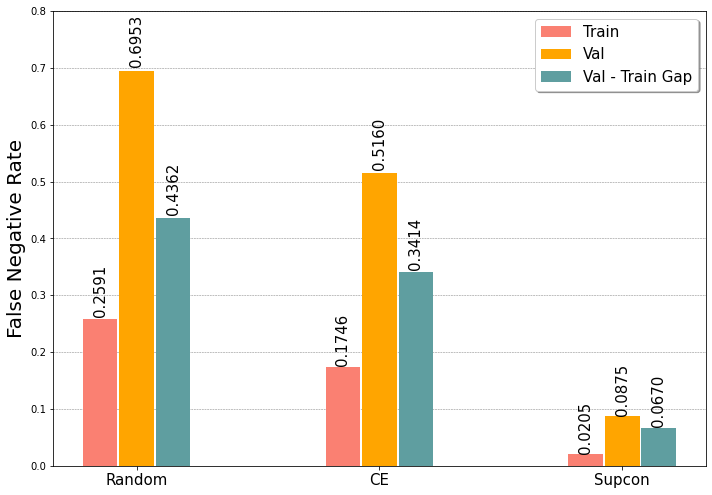

In [56]:
xticks = ['Random', 'CE', 'Supcon']

data = {
    'Train': train.mean(axis=1),
    'Val': val.mean(axis=1),
    'Val - Train Gap': val.mean(1) - train.mean(1),
}

plot(xticks, data, ylim=0.8, figsize=(10, 7))

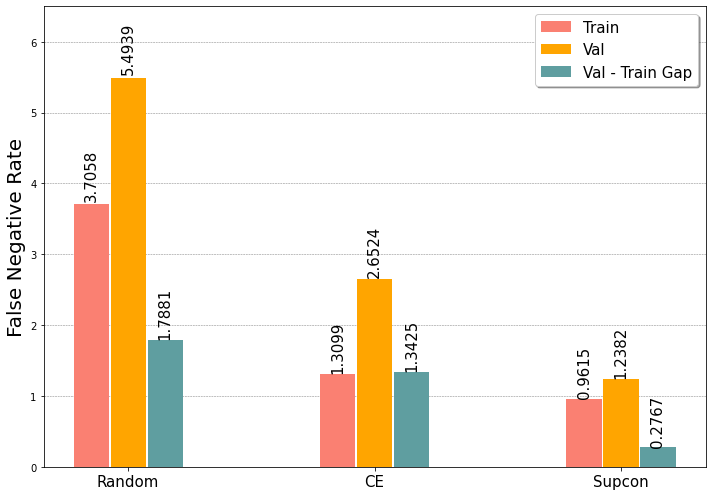

In [53]:
# KIA
train = np.array([
    [0.1865, 0.0875, 13.1818, 1.3673],
    [0.2332, 0.0437, 4.9091, 0.0536],
    [0.1969, 0.0583, 3.5909, 0.0000],
])

val = np.array([
    [0.2535, 0.0680, 20.5291, 1.1250],
    [0.3742, 0.0000, 9.7354, 0.5000],
    [0.1569, 0.0340, 4.7619, 0.0000],
])
xticks = ['Random', 'CE', 'Supcon']

data = {
    'Train': train.mean(axis=1),
    'Val': val.mean(axis=1),
    'Val - Train Gap': val.mean(1) - train.mean(1)
}

plot(xticks, data, ylim=6.5, figsize=(10, 7))